# **Parameter Optimization for Multiclass Dataset**
### Done By Sahil Manchanda
### Roll No: 102103134
### Group: 3CO5

In [1]:
!pip install ucimlrepo
!pip install bayesian-optimization

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/22/47/9350b2eeeaef8c0fd3ec3505c8a0481b576845b3df0d71c76f989c23d3c6/ucimlrepo-0.0.6-py3-none-any.whl.metadata


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for bayesian-optimization from https://files.pythonhosted.org/packages/45/cf/3016b660afca02c6ecca3c1cc6d8df3b8f1a6ff4878103204d0aa6b4c769/bayesian_optimization-1.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for colorama>=0.4.6 from https://files.pythonhosted.org/packages/d1/d6/3965ed04c63042e047cb6a3e6ed1a63a35087b6a609aa3a15ed8ac56c221/colorama-0.4.6-py2.py3-none-any.whl.metadata
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.

[notice] A new release of pip is available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install bayesian_optimization==1.4.0
!pip install colorama==0.4.4

  Obtaining dependency information for bayesian_optimization==1.4.0 from https://files.pythonhosted.org/packages/2c/af/478deae10abb1cc1034993064b41dbc6015734b4f8cafa2c3d1a05861f75/bayesian_optimization-1.4.0-py3-none-any.whl.metadata
  Attempting uninstall: bayesian_optimization
    Found existing installation: bayesian-optimization 1.4.3
    Uninstalling bayesian-optimization-1.4.3:
      Successfully uninstalled bayesian-optimization-1.4.3


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for colorama==0.4.4 from https://files.pythonhosted.org/packages/44/98/5b86278fbbf250d239ae0ecb724f8572af1c91f4a11edf4d36a206189440/colorama-0.4.4-py2.py3-none-any.whl.metadata
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.6
    Uninstalling colorama-0.4.6:
      Successfully uninstalled colorama-0.4.6


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.

[notice] A new release of pip is available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
X = magic_gamma_telescope.data.features 
y = magic_gamma_telescope.data.targets 
  
# metadata 
print(magic_gamma_telescope.metadata) 
  
# variable information 
print(magic_gamma_telescope.variables) 

{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [3]:
print("First few rows of features (X):")
print(X.head())

First few rows of features (X):
    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620  


In [4]:
print("\nFirst few rows of targets (y):")
print(y.head())


First few rows of targets (y):
  class
0     g
1     g
2     g
3     g
4     g


In [5]:
print(y)

      class
0         g
1         g
2         g
3         g
4         g
...     ...
19015     h
19016     h
19017     h
19018     h
19019     h

[19020 rows x 1 columns]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)

In [7]:
# kernels = ['linear', 'poly', 'sigmoid', 'rbf', 'anovadot']
kernels=['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}

In [8]:
def evaluate_svm(kernel, nu, tol):
  kernel_name = kernels[int(kernel)]
  model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [9]:
# results = []
# optimizers = []
# for sample in range(1):
#   optimizer = BayesianOptimization(evaluate_svm, pbounds)
#   optimizer.maximize(init_points=5, n_iter=20)
#   best_params = optimizer.max['params']
#   best_accuracy = optimizer.max['target']
#   results.append((sample, best_accuracy, best_params))
#   optimizers.append(optimizer)

results = []
optimizers = []
targets = []  # Store target values (accuracy scores)
iteration_counts = []  # Store iteration counts

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))
    optimizers.append(optimizer)

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])

|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.2886    | 1.667     | 0.04436   | 0.1674    |
| 2         | 0.5785    | 0.05978   | 0.07417   | 0.4718    |
| 3         | 0.5193    | 1.437     | 0.09173   | 0.3271    |
| 4         | 0.4406    | 1.156     | 0.06532   | 0.3766    |
| 5         | 0.7063    | 1.086     | 0.05971   | 0.04863   |
| 6         | 0.6435    | 1.929     | 0.07705   | 0.6769    |
| 7         | 0.6064    | 1.254     | 0.01709   | 0.06305   |
| 8         | 0.7192    | 1.735     | 0.0333    | 0.05157   |
| 9         | 0.6223    | 1.848     | 0.05329   | 0.7875    |
| 10        | 0.3481    | 0.7954    | 0.04901   | 0.5072    |
| 11        | 0.4371    | 1.886     | 0.07769   | 0.7211    |
| 12        | 0.7685    | 1.652     | 0.06923   | 0.4671    |
| 13        | 0.5953    | 1.215     | 0.02082   | 0.4509    |
| 14        | 0.6644    | 1.645     | 0.09991   | 0.8672    |
| 15    

| 80        | 0.7787    | 1.771     | 0.09179   | 0.05383   |
| 81        | 0.756     | 1.715     | 0.0824    | 0.05177   |
| 82        | 0.7702    | 1.77      | 0.09489   | 0.05182   |
| 83        | 0.7383    | 1.013     | 0.04261   | 0.02053   |
| 84        | 0.3742    | 0.08854   | 0.02074   | 0.9888    |
| 85        | 0.6215    | 0.2016    | 0.05797   | 0.7395    |
| 86        | 0.401     | 1.25      | 0.07953   | 0.8593    |
| 87        | 0.4104    | 1.315     | 0.09755   | 0.7415    |
| 88        | 0.7168    | 1.028     | 0.04533   | 0.1402    |
| 89        | 0.6064    | 1.111     | 0.0429    | 0.2289    |
| 90        | 0.4657    | 1.709     | 0.07451   | 0.05045   |
| 91        | 0.3265    | 0.8204    | 0.02913   | 0.04696   |
| 92        | 0.5482    | 0.0451    | 0.08209   | 0.3072    |
| 93        | 0.4143    | 1.65      | 0.07489   | 0.4742    |
| 94        | 0.745     | 1.016     | 0.04588   | 0.01619   |
| 95        | 0.5648    | 0.4745    | 0.09741   | 0.2645    |
| 96    

| 54        | 0.4069    | 1.378     | 0.0993    | 0.7638    |
| 55        | 0.4774    | 0.2119    | 0.02288   | 0.1993    |
| 56        | 0.2448    | 0.6889    | 0.08919   | 0.8605    |
| 57        | 0.7357    | 0.8724    | 0.06754   | 0.7657    |
| 58        | 0.4902    | 0.562     | 0.06475   | 0.7166    |
| 59        | 0.4891    | 0.9219    | 0.01702   | 0.8317    |
| 60        | 0.2615    | 1.449     | 0.01698   | 0.1123    |
| 61        | 0.4467    | 1.525     | 0.09338   | 0.4611    |
| 62        | 0.7462    | 1.922     | 0.09607   | 0.5943    |
| 63        | 0.3649    | 1.52      | 0.02269   | 0.1934    |
| 64        | 0.4494    | 1.583     | 0.05546   | 0.1237    |
| 65        | 0.7056    | 0.647     | 0.09855   | 0.03146   |
| 66        | 0.5997    | 0.4673    | 0.02877   | 0.8374    |
| 67        | 0.5875    | 1.181     | 0.09471   | 0.3448    |
| 68        | 0.387     | 1.953     | 0.02624   | 0.1678    |
| 69        | 0.3521    | 0.8261    | 0.03618   | 0.4142    |
| 70    

| 28        | 0.5103    | 0.5852    | 0.08884   | 0.362     |
| 29        | 0.612     | 0.2401    | 0.01833   | 0.944     |
| 30        | 0.6099    | 0.5486    | 0.09238   | 0.116     |
| 31        | 0.6293    | 0.9524    | 0.0246    | 0.6274    |
| 32        | 0.5825    | 1.58      | 0.06139   | 0.3825    |
| 33        | 0.5435    | 0.3285    | 0.09681   | 0.8083    |
| 34        | 0.3209    | 0.2299    | 0.08667   | 0.727     |
| 35        | 0.5471    | 0.3208    | 0.09378   | 0.1856    |
| 36        | 0.48      | 0.4579    | 0.04654   | 0.3884    |
| 37        | 0.5084    | 0.06454   | 0.02248   | 0.1911    |
| 38        | 0.6165    | 0.05557   | 0.07774   | 0.8216    |
| 39        | 0.4297    | 1.414     | 0.06976   | 0.1288    |
| 40        | 0.6668    | 0.7037    | 0.06442   | 0.6512    |
| 41        | 0.5822    | 0.1245    | 0.02724   | 0.3863    |
| 42        | 0.5315    | 1.371     | 0.07814   | 0.2575    |
| 43        | 0.4422    | 0.08769   | 0.04295   | 0.5885    |
| 44    

| 2         | 0.4707    | 1.286     | 0.07707   | 0.2513    |
| 3         | 0.4634    | 1.534     | 0.09244   | 0.25      |
| 4         | 0.605     | 0.01818   | 0.08826   | 0.3171    |
| 5         | 0.3612    | 1.995     | 0.07402   | 0.6954    |
| 6         | 0.6374    | 1.04      | 0.07421   | 0.4479    |
| 7         | 0.528     | 0.9502    | 0.03457   | 0.3797    |
| 8         | 0.3321    | 0.3491    | 0.05226   | 0.05124   |
| 9         | 0.6059    | 0.2256    | 0.09681   | 0.4753    |
| 10        | 0.7254    | 1.479     | 0.04384   | 0.5685    |
| 11        | 0.4874    | 1.164     | 0.03088   | 0.05161   |
| 12        | 0.5974    | 0.5876    | 0.0722    | 0.5422    |
| 13        | 0.5745    | 0.07912   | 0.08132   | 0.739     |
| 14        | 0.6887    | 1.633     | 0.07107   | 0.01123   |
| 15        | 0.7166    | 1.886     | 0.06895   | 0.6104    |
| 16        | 0.4324    | 1.185     | 0.02239   | 0.4117    |
| 17        | 0.414     | 0.3364    | 0.01816   | 0.6604    |
| 18    

| 83        | 0.4257    | 0.2825    | 0.02121   | 0.05474   |
| 84        | 0.5475    | 0.8408    | 0.07224   | 0.05913   |
| 85        | 0.7666    | 1.073     | 0.06375   | 0.08249   |
| 86        | 0.4607    | 0.2257    | 0.09694   | 0.7763    |
| 87        | 0.3908    | 1.478     | 0.0414    | 0.5726    |
| 88        | 0.5435    | 1.816     | 0.05093   | 0.9903    |
| 89        | 0.3601    | 0.5023    | 0.07429   | 0.693     |
| 90        | 0.4723    | 1.901     | 0.05376   | 0.974     |
| 91        | 0.4331    | 1.071     | 0.06671   | 0.08751   |
| 92        | 0.6525    | 0.6155    | 0.08364   | 0.61      |
| 93        | 0.7494    | 1.859     | 0.0113    | 0.97      |
| 94        | 0.5077    | 0.8618    | 0.07776   | 0.7812    |
| 95        | 0.3859    | 1.089     | 0.05426   | 0.6185    |
| 96        | 0.5543    | 0.7151    | 0.03735   | 0.7381    |
| 97        | 0.5317    | 0.5938    | 0.099     | 0.7127    |
| 98        | 0.5428    | 1.098     | 0.04153   | 0.8668    |
| 99    

| 57        | 0.3849    | 1.188     | 0.06237   | 0.5421    |
| 58        | 0.5266    | 0.6237    | 0.01705   | 0.6322    |
| 59        | 0.4348    | 0.1343    | 0.04918   | 0.02483   |
| 60        | 0.6052    | 1.214     | 0.01739   | 0.1347    |
| 61        | 0.7625    | 0.3696    | 0.07551   | 0.7215    |
| 62        | 0.6211    | 0.65      | 0.07642   | 0.005917  |
| 63        | 0.4017    | 1.525     | 0.0487    | 0.6278    |
| 64        | 0.5492    | 0.02421   | 0.08372   | 0.7394    |
| 65        | 0.497     | 1.171     | 0.05176   | 0.1006    |
| 66        | 0.4061    | 1.166     | 0.0226    | 0.2821    |
| 67        | 0.4199    | 0.9355    | 0.01385   | 0.5692    |
| 68        | 0.6269    | 0.4963    | 0.02341   | 0.9596    |
| 69        | 0.3202    | 0.7075    | 0.01499   | 0.4908    |
| 70        | 0.8048    | 1.8       | 0.08101   | 0.06537   |
| 71        | 0.6828    | 0.7483    | 0.05877   | 0.01924   |
| 72        | 0.6234    | 1.642     | 0.03284   | 0.5127    |
| 73    

| 31        | 0.6229    | 0.5477    | 0.07058   | 0.907     |
| 32        | 0.5093    | 1.003     | 0.1       | 0.1586    |
| 33        | 0.7017    | 0.5551    | 0.08234   | 0.9142    |
| 34        | 0.5065    | 0.3471    | 0.05676   | 0.6386    |
| 35        | 0.4492    | 1.341     | 0.05897   | 0.2674    |
| 36        | 0.5098    | 0.5771    | 0.07416   | 0.7595    |
| 37        | 0.5882    | 0.8278    | 0.08261   | 0.1033    |
| 38        | 0.6411    | 1.416     | 0.06226   | 0.7478    |
| 39        | 0.4828    | 1.535     | 0.07052   | 0.6347    |
| 40        | 0.7131    | 1.46      | 0.07146   | 0.5385    |
| 41        | 0.3824    | 1.802     | 0.0556    | 0.987     |
| 42        | 0.54      | 1.667     | 0.02335   | 0.0154    |
| 43        | 0.3584    | 1.323     | 0.02098   | 0.5402    |
| 44        | 0.5135    | 0.6601    | 0.03811   | 0.3885    |
| 45        | 0.5617    | 0.2693    | 0.0123    | 0.4358    |
| 46        | 0.7233    | 0.1586    | 0.01361   | 0.6555    |
| 47    

| 5         | 0.4834    | 0.2184    | 0.09449   | 0.2599    |
| 6         | 0.2815    | 0.705     | 0.08192   | 0.8333    |
| 7         | 0.7166    | 0.447     | 0.01      | 0.4828    |
| 8         | 0.7166    | 0.5648    | 0.01      | 0.4208    |
| 9         | 0.5883    | 0.5254    | 0.01      | 0.1918    |
| 10        | 0.4625    | 0.4471    | 0.01324   | 0.4628    |
| 11        | 0.2457    | 0.9131    | 0.04874   | 0.9565    |
| 12        | 0.6982    | 1.135     | 0.0838    | 0.8887    |
| 13        | 0.7354    | 0.5973    | 0.01668   | 0.7919    |
| 14        | 0.7562    | 1.578     | 0.03436   | 0.3132    |
| 15        | 0.6351    | 1.41      | 0.02093   | 0.03559   |
| 16        | 0.6919    | 1.959     | 0.06335   | 0.4151    |
| 17        | 0.7815    | 1.153     | 0.04975   | 0.5913    |
| 18        | 0.4357    | 1.184     | 0.0991    | 0.6757    |
| 19        | 0.7629    | 1.036     | 0.06423   | 0.2445    |
| 20        | 0.3481    | 1.39      | 0.01602   | 0.1971    |
| 21    

| 86        | 0.6232    | 1.908     | 0.01907   | 0.3501    |
| 87        | 0.6502    | 0.8728    | 0.05701   | 0.9559    |
| 88        | 0.4616    | 1.548     | 0.0328    | 0.5498    |
| 89        | 0.5792    | 0.8015    | 0.04211   | 0.7207    |
| 90        | 0.5796    | 0.5362    | 0.05693   | 0.4528    |
| 91        | 0.7249    | 1.559     | 0.09012   | 0.00279   |
| 92        | 0.5796    | 1.785     | 0.02859   | 0.5102    |
| 93        | 0.5205    | 1.133     | 0.07086   | 0.03657   |
| 94        | 0.4201    | 1.129     | 0.07455   | 0.6879    |
| 95        | 0.528     | 0.6915    | 0.08008   | 0.6292    |
| 96        | 0.3388    | 0.5892    | 0.01352   | 0.2118    |
| 97        | 0.7645    | 1.116     | 0.05086   | 0.03933   |
| 98        | 0.4129    | 1.508     | 0.06322   | 0.3852    |
| 99        | 0.739     | 0.4104    | 0.0673    | 0.1383    |
| 100       | 0.732     | 0.7571    | 0.04669   | 0.4585    |
| 101       | 0.5417    | 0.7424    | 0.07617   | 0.2869    |
| 102   

| 60        | 0.4125    | 0.1673    | 0.07479   | 0.1217    |
| 61        | 0.4492    | 1.335     | 0.04045   | 0.0991    |
| 62        | 0.4185    | 0.8293    | 0.02195   | 0.6726    |
| 63        | 0.2695    | 1.977     | 0.04937   | 0.05581   |
| 64        | 0.442     | 0.7843    | 0.04499   | 0.3552    |
| 65        | 0.6367    | 1.636     | 0.05968   | 0.7691    |
| 66        | 0.7697    | 1.329     | 0.078     | 0.09197   |
| 67        | 0.7277    | 1.819     | 0.09904   | 0.8344    |
| 68        | 0.6423    | 0.1476    | 0.0974    | 0.7657    |
| 69        | 0.5612    | 1.158     | 0.02635   | 0.4398    |
| 70        | 0.5407    | 0.9297    | 0.09849   | 0.3082    |
| 71        | 0.5242    | 1.672     | 0.08303   | 0.4651    |
| 72        | 0.5254    | 0.9888    | 0.07525   | 0.5986    |
| 73        | 0.3989    | 0.1817    | 0.08103   | 0.7419    |
| 74        | 0.5591    | 1.668     | 0.02784   | 0.1462    |
| 75        | 0.4711    | 0.06627   | 0.04245   | 0.8192    |
| 76    

| 35        | 0.4593    | 1.794     | 0.02329   | 0.4667    |
| 36        | 0.4679    | 0.7781    | 0.05664   | 0.7802    |
| 37        | 0.4567    | 0.5196    | 0.04166   | 0.3086    |
| 38        | 0.3933    | 1.825     | 0.03599   | 0.8865    |
| 39        | 0.5585    | 1.539     | 0.04148   | 0.8475    |
| 40        | 0.715     | 1.228     | 0.05607   | 0.8479    |
| 41        | 0.7532    | 0.7559    | 0.0831    | 0.8881    |
| 42        | 0.2958    | 1.894     | 0.03732   | 0.116     |
| 43        | 0.7124    | 1.664     | 0.09138   | 0.07998   |
| 44        | 0.5603    | 1.245     | 0.02322   | 0.4673    |
| 45        | 0.4343    | 1.521     | 0.04471   | 0.3427    |
| 46        | 0.5205    | 0.3901    | 0.0194    | 0.6531    |
| 47        | 0.2487    | 1.823     | 0.02481   | 0.2639    |
| 48        | 0.4939    | 0.2856    | 0.05154   | 0.2819    |
| 49        | 0.3787    | 1.646     | 0.09578   | 0.3928    |
| 50        | 0.6837    | 0.4339    | 0.06565   | 0.8085    |
| 51    

| 9         | 0.7352    | 1.113     | 0.09729   | 0.3536    |
| 10        | 0.261     | 1.452     | 0.06979   | 0.6026    |
| 11        | 0.4662    | 0.6068    | 0.01782   | 0.5431    |
| 12        | 0.5372    | 0.1788    | 0.03039   | 0.7379    |
| 13        | 0.6157    | 1.689     | 0.03227   | 0.9886    |
| 14        | 0.4043    | 0.1883    | 0.05328   | 0.8719    |
| 15        | 0.3889    | 1.88      | 0.06323   | 0.167     |
| 16        | 0.7802    | 1.77      | 0.07913   | 0.04619   |
| 17        | 0.6379    | 1.428     | 0.07217   | 0.4891    |
| 18        | 0.5301    | 0.5571    | 0.07954   | 0.2901    |
| 19        | 0.65      | 1.678     | 0.02834   | 0.5957    |
| 20        | 0.3877    | 1.711     | 0.07973   | 0.9862    |
| 21        | 0.7494    | 0.5851    | 0.06373   | 0.8355    |
| 22        | 0.4958    | 0.4627    | 0.01685   | 0.5496    |
| 23        | 0.5219    | 0.764     | 0.07046   | 0.5493    |
| 24        | 0.7517    | 0.1825    | 0.06917   | 0.181     |
| 25    

| 90        | 0.6854    | 0.2565    | 0.04693   | 0.1988    |
| 91        | 0.4567    | 1.778     | 0.02603   | 0.6484    |
| 92        | 0.5365    | 0.4473    | 0.01248   | 0.6973    |
| 93        | 0.558     | 0.6492    | 0.08003   | 0.2079    |
| 94        | 0.6663    | 0.7634    | 0.06949   | 0.8185    |
| 95        | 0.602     | 1.76      | 0.05679   | 0.09283   |
| 96        | 0.609     | 1.891     | 0.04783   | 0.7715    |
| 97        | 0.7846    | 1.922     | 0.05381   | 0.5341    |
| 98        | 0.5056    | 0.5715    | 0.0228    | 0.2514    |
| 99        | 0.5186    | 0.5075    | 0.02984   | 0.9046    |
| 100       | 0.4204    | 1.212     | 0.08783   | 0.8581    |
| 101       | 0.5857    | 1.664     | 0.06759   | 0.1389    |
| 102       | 0.7371    | 1.074     | 0.08914   | 0.8878    |
| 103       | 0.6067    | 0.6017    | 0.05221   | 0.7836    |
| 104       | 0.5522    | 0.9296    | 0.01942   | 0.9897    |
| 105       | 0.3901    | 1.543     | 0.08958   | 0.7722    |


In [10]:
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.802313  {'kernel': 1.7036198855582476, 'nu': 0.0755005...
1       1       0.792149  {'kernel': 1.692785292401264, 'nu': 0.06442367...
2       2       0.821591  {'kernel': 1.4715400608151852, 'nu': 0.0905071...
3       3       0.779180  {'kernel': 1.487934676722942, 'nu': 0.04368094...
4       4       0.804767  {'kernel': 1.800246800135416, 'nu': 0.08100817...
5       5       0.773396  {'kernel': 0.5475762421481853, 'nu': 0.0734499...
6       6       0.781458  {'kernel': 1.153425873324237, 'nu': 0.04974526...
7       7       0.801788  {'kernel': 1.6299879353804467, 'nu': 0.0840702...
8       8       0.789520  {'kernel': 1.638674940345826, 'nu': 0.03630532...
9       9       0.787767  {'kernel': 1.2799245348621486, 'nu': 0.0617554...


In [11]:
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"Sample with maximum accuracy: {max_accuracy_sample['Sample']}")

Sample with maximum accuracy: 2


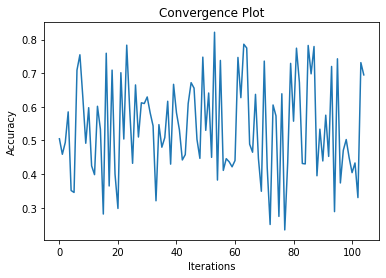

In [12]:
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
iterations = range(iteration_counts[max_accuracy_optimizer_idx])
plt.plot(iterations, targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot')
plt.show()